# «Гетероскедастичность»

# Выполнил:
# Радайкин Артём, ПМ20-4 

## Загружаем данные

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import patsy as pt
import sklearn.linear_model as lm
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Эконометрика /Семинар_5.csv', sep=';')
df.head(5)

,Year,Y,X
0,1,310,390
1,2,350,385
2,3,330,545
3,4,425,680
4,5,502,810


# Задания:

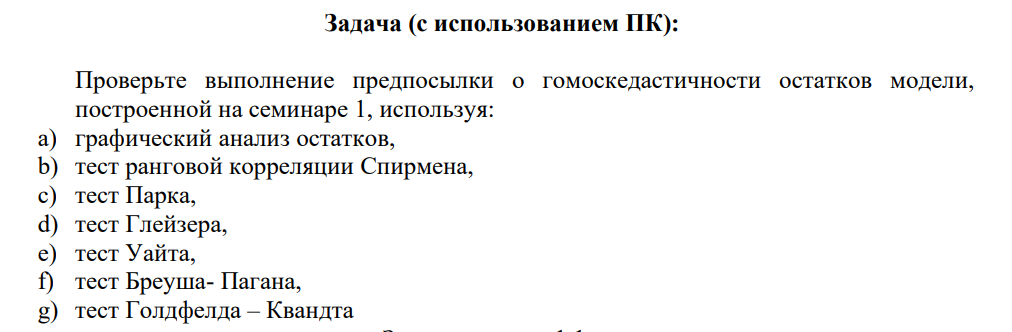

In [ ]:
X = df['X'].values
Y = df['Y'].values

In [ ]:
model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
print(result.params)

Intercept    132.154658
X              0.418563
dtype: float64


In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     45.23
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           9.27e-07
Time:                        17:17:45   Log-Likelihood:                -121.84
No. Observations:                  24   AIC:                             247.7
Df Residuals:                      22   BIC:                             250.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.1547     41.799      3.162      0.0

In [ ]:
y_hat = model.predict(result.params, sm.add_constant(X))
vector_Se = y_hat - Y
vector_Se

array([-14.60594938, -56.6987621 ,  30.27124498,  -8.22281154,
       -30.80968078,  98.63344289,  42.81906833, -44.27374439,
        19.57967606,  48.99280682,  34.92093403, -26.48030977,
       -14.85156065,   5.9628139 ,  59.22031213,  45.262192  ,
         8.63344289, -31.25280446, -10.89344053, -11.82156774,
       -26.59406243, -39.12999882, -43.92343344, -34.737808  ])

### **Графический анализ остатков**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


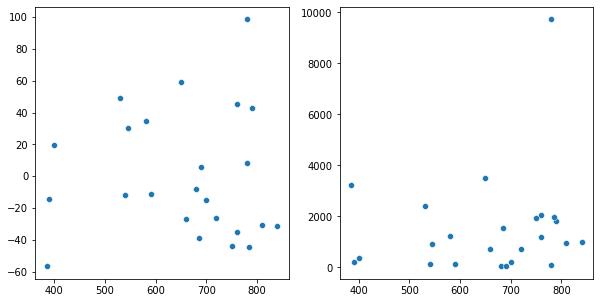

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))

sns.scatterplot(X, vector_Se, ax=axes[0])
sns.scatterplot(X, vector_Se**2, ax=axes[1])

### **Тест ранговой корреляции Спирмена**
#### Между модулями ошибок и X

In [ ]:
sts.spearmanr(np.abs(vector_Se), X)

SpearmanrResult(correlation=0.13701610691564495, pvalue=0.5231951496094867)

p-value = 0.5231951496094867 > 0.05 => H0 принимается  и => гетероскедастичны остатки модели

### **Тест Парка**

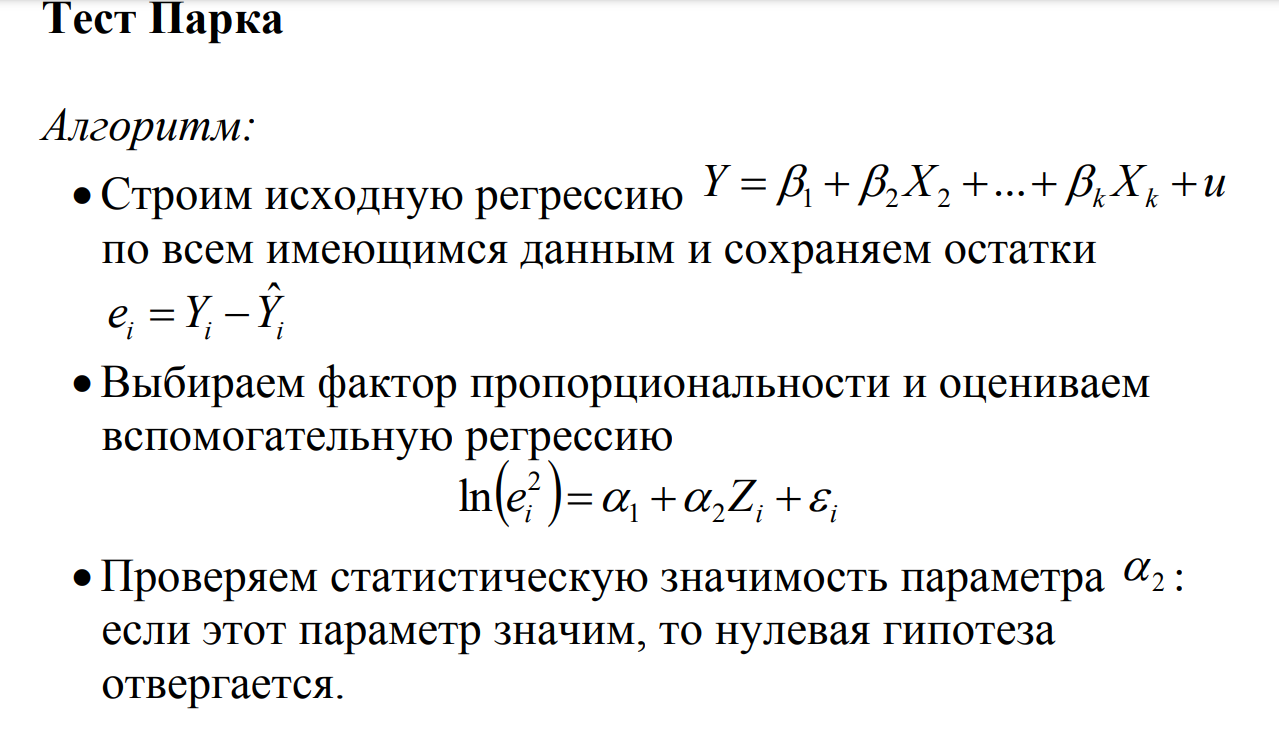

In [ ]:
model_2 = sm.OLS.from_formula("np.log(vector_Se**2) ~ np.log(X)", data=df)
result_2 = model_2.fit()
print(result_2.params)

Intercept    1.952879
np.log(X)    0.711109
dtype: float64


In [ ]:
print(result_2.summary())

                              OLS Regression Results                              
Dep. Variable:     np.log(vector_Se ** 2)   R-squared:                       0.013
Model:                                OLS   Adj. R-squared:                 -0.032
Method:                     Least Squares   F-statistic:                    0.2973
Date:                    Fri, 09 Dec 2022   Prob (F-statistic):              0.591
Time:                            17:17:46   Log-Likelihood:                -42.020
No. Observations:                      24   AIC:                             88.04
Df Residuals:                          22   BIC:                             90.40
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [ ]:
t_tabl = sts.t.isf(0.05/2,22)
t_tabl

2.073873067904015

Значимость параметра дополнительной модели:
|t_набл| < t_табл (0.545 < 2.073873067904015) => H0 принимается => параметр модели незначим => гипотеза принимается и => гомоскедастичны остатки модели 

### **Тест Глейзера**

1 ; -0.5, 0.5; 1.5; -1

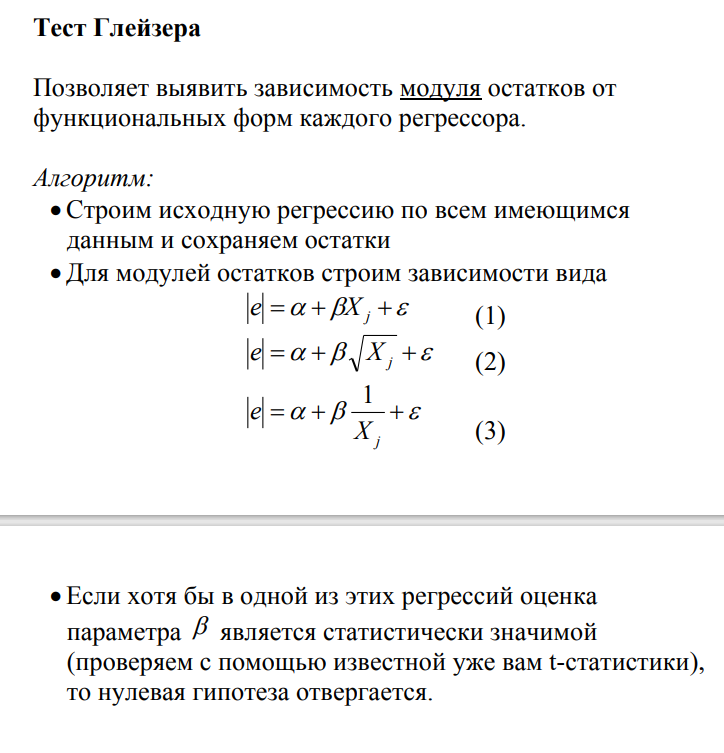

In [ ]:
result = [0, 1, 2, 3, 4, 5]
model = ['X', 'np.sqrt(X)', 'np.abs(1/X)', 'np.abs(1 / np.sqrt(X))', 'np.sqrt(X ** 3)']

result[1] = sm.OLS.from_formula("np.abs(vector_Se) ~ X", data = df).fit().tvalues['X']
result[2] = sm.OLS.from_formula("np.abs(vector_Se) ~ np.sqrt(X)", data = df).fit().tvalues['np.sqrt(X)']
result[3] = sm.OLS.from_formula("np.abs(vector_Se) ~ np.abs(1/X)", data = df).fit().tvalues['np.abs(1 / X)']
result[4] = sm.OLS.from_formula("np.abs(vector_Se) ~ np.abs(1 / np.sqrt(X))", data = df).fit().tvalues['np.abs(1 / np.sqrt(X))']
result[5] = sm.OLS.from_formula("np.abs(vector_Se) ~ np.sqrt(X ** 3)", data = df).fit().tvalues['np.sqrt(X ** 3)']

for i in range(5):
    print(f'Model : {model[i]}\nt-stats : {result[i + 1]};')


Model : X
t-stats : 0.7935388284901056;
Model : np.sqrt(X)
t-stats : 0.7432130602685626;
Model : np.abs(1/X)
t-stats : -0.5824717762405845;
Model : np.abs(1 / np.sqrt(X))
t-stats : -0.6365793767746944;
Model : np.sqrt(X ** 3)
t-stats : 0.8406059832522756;


Все t-значения меньше табличного => гипотеза Н0 принимается и присутствует гомоскедастичность

### Тест Уайта:

In [ ]:
from statsmodels.stats.diagnostic import het_white

white_test = np.round(het_white(vector_Se, result.model.exog), 4) # во 2-м это Х
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 1.1781, 'Test Statistic p-value': 0.5548, 'F-Statistic': 0.542, 'F-Test p-value': 0.5895}


p-value = 0.5548 > 0.05 => H0 принимается => остатки гомоскедатичны

### Тест Голдфелда-Квандта

In [ ]:
#Тест Голфреда-Кванта
from statsmodels.stats import api
new_x = np.concatenate((np.ones((len(Y), 1)), X.reshape(-1, 1)), axis = 1)
api.het_goldfeldquandt(vector_Se, new_x)

(0.5174470920501952, 0.8431082250887834, 'increasing')

p-value = 0.8431082250887834 > 0.05 => H0 принимается => остатки гомоскедатичны